<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - In-class Exam



---
#### Guidelines 
- This is your notebook for your in-class midterm exam. 
- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, if you do, your answers will be considered invalid = **0%**).
- The in-class exam is **10%** of your total midterm score.
- During the exam you can only have the following websites open in your browser:
    * [ECON-628-01 github][1]
    * ECON-628-01-yourgithubusersname 
    * [StackOverflow][2]  
- If we noticed that your computer browser has other websites open, you will be asked to **close your computer, leave the class, and will get an score of 0%**
- Remember: if you are using code from someone else/online (StackOverflow) you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
    


- Once you are done with your exam use this [link][3] to **submit** the GitHub link to your take home exam.
[1]:https://github.com/jrcmalunay/ECON628-01 "ECON-628-01 github"
[2]:http://stackoverflow.com "StackOverflow"
[3]: https://docs.google.com/forms/d/e/1FAIpQLSercXrXIky91taz98tPviIqA8C0FaQZ_WIfNoRYxMbV5wPtkg/viewform "link"

---



### Dataset 
This dataset comes from the Sleep and the allocation of time [paper][1] by Biddle, Jeff and Hamermesh, Daniel where using aggregated data for 12 countries, a cross section of microeconomic data, and a panel of households, they demonstrate that increases in time in the labor market reduce sleep!!!! The variables are:
https://www.jstor.org/stable/2937618?seq=1#page_scan_tab_contents

| **Name**   |      **Description**     |  
|----------|:-------------:|
| age | in years | 
| black | =1 if black | 
| case | identifier | 
| clerical | =1 if clerical worker |
| construc | =1 if construction worker |
| educ | years of schooling|
| earns74 | total earnings, 1974 |
| gdhlth | =1 if in good or excellent health |
| inlf |  =1 if in labor force |
|leis1  |sleep - totwrk|
|leis2  |slpnaps - totwrk|
|leis3  |rlxall - totwrk|
| smsa |  =1 if living in SMSA |
| | SMSA is the Standard Metropolitan Statistical Area, an integrated economic and social unit having a large population nucleus. It is a good indicator of living in a city.|
|lhrwage| log hourly wage|
|lothinc | log othinc, unless othinc < 0
| male |  =1 if male |
| marr | =1 if married |
| prot | =1 if Protestant |
|rlxall |slpnaps + personal activs|
| selfe  | =1 if self employed|
| sleep | minutes sleep at night, per week |
| slpnaps | minutes sleep, including naps, per week |
| south |  =1 if live in south |
| spsepay |  spousal wage income |
| spwrk75 |  =1 if spouse works |
| totwrk | minutes worked per week |
| union |  =1 if belong to union |
| worknrm | minutes work main job |
| workscnd | minutes work second job |
|exper     | age - educ - 6 |
| yngkid | =1 if children less than 3 years present |
| yrsmarr | years married |
| hrwage | hourly wage |
|agesq   |age^2|


[1]:https://core.ac.uk/download/pdf/6820141.pdf "paper"


---


---

## The Scenario
---
The PI (principal investigator) of a project you are working for, claims that nowadays people sleep "more" because access to the internet and the mechanization of labor reduces their work time. Based on this assumption, he wants to implement a literacy program that requires participants to read 1 chapter of a book one hour before their bed time and one section of an introduction to mathematics book one hour before they leave their home for work.

**He asks you to find out if people are indeed sleeping more or not, before he implements the literacy program.** 
Assume that, you don't have any other dataset but the one from the Biddle and Hamermesh paper to answer this question. 
Use all the predictive methods, you consider neccesary to give  an answer to the PI, and make sure you explain the output of your predictive analysis.


---

### Basic package imports
---

In [189]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [190]:
from patsy import dmatrices
import statsmodels.formula.api as smf
import patsy
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV

## 1. Read/load the dataset "sleep_bh.csv" and do an initial overview of the data
    Check the shape of your data
    Cheeck the type of values
    Identify which variables have missing values
    Print a list of the indices where there are missing values
---

In [191]:
# Loading Sleep Dataset
sleep_path = '/home/dsi-student/Desktop/ECON628-01/datasets/sleep/sleep_bh.csv'
sleep = pd.read_csv(sleep_path)

In [192]:
# Head of Dataset
sleep.head()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.0,0.0,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.0,0.0,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.0,0.0,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.0,0.0,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.0,0.0,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096


In [193]:
# Tail of Dataset
sleep.tail()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,1,2026,0,2026,0,27,0,18,NaN,2025
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,0,675,1,465,210,18,0,4,NaN,1156
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1,1851,0,1851,0,19,0,17,NaN,1369
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1,1961,1,1481,480,31,0,22,NaN,2916
705,30,0,706,0.182331,0.030075,16,6750,1,0,4747,...,0,2363,0,2363,0,8,1,9,NaN,900


In [195]:
# Description of Dataset
sleep.describe()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
count,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,...,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,532.000000,706.000000
mean,38.815864,0.049575,353.500000,0.182331,0.030075,12.780453,9767.705382,0.890935,0.753541,4690.723796,...,0.480170,2122.920680,0.218130,2093.252125,29.668555,20.035411,0.128895,11.769122,5.082839,1635.144476
std,11.342637,0.217219,203.948932,0.335413,0.148366,2.784702,9323.588151,0.311942,0.431254,908.049561,...,0.499961,947.470123,0.413269,945.301457,148.834262,12.377520,0.335321,11.591227,3.704385,950.102976
min,23.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1745.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.350000,529.000000
25%,29.000000,0.000000,177.250000,0.000000,0.000000,12.000000,2500.000000,1.000000,1.000000,4109.750000,...,0.000000,1553.500000,0.000000,1538.000000,0.000000,10.000000,0.000000,0.000000,2.890001,841.000000
50%,36.000000,0.000000,353.500000,0.000000,0.000000,12.000000,8250.000000,1.000000,1.000000,4620.000000,...,0.000000,2288.000000,0.000000,2275.000000,0.000000,17.000000,0.000000,9.000000,4.379999,1296.000000
75%,48.000000,0.000000,529.750000,0.182331,0.030075,16.000000,13750.000000,1.000000,1.000000,5203.750000,...,1.000000,2691.750000,0.000000,2635.500000,0.000000,30.000000,0.000000,20.000000,6.210001,2304.000000
max,65.000000,1.000000,706.000000,1.000000,1.000000,17.000000,42500.000000,1.000000,1.000000,7417.000000,...,1.000000,6415.000000,1.000000,6415.000000,1337.000000,55.000000,1.000000,43.000000,35.509987,4225.000000


In [196]:
# Data Types of Dataset
sleep.dtypes

age           int64
black         int64
case          int64
clerical    float64
construc    float64
educ          int64
earns74       int64
gdhlth        int64
inlf          int64
leis1         int64
leis2         int64
leis3         int64
smsa          int64
lhrwage     float64
lothinc     float64
male          int64
marr          int64
prot          int64
rlxall        int64
selfe         int64
sleep         int64
slpnaps       int64
south         int64
spsepay       int64
spwrk75       int64
totwrk        int64
union         int64
worknrm       int64
workscnd      int64
exper         int64
yngkid        int64
yrsmarr       int64
hrwage      float64
agesq         int64
dtype: object

In [197]:
# Info of Dataset
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 34 columns):
age         706 non-null int64
black       706 non-null int64
case        706 non-null int64
clerical    706 non-null float64
construc    706 non-null float64
educ        706 non-null int64
earns74     706 non-null int64
gdhlth      706 non-null int64
inlf        706 non-null int64
leis1       706 non-null int64
leis2       706 non-null int64
leis3       706 non-null int64
smsa        706 non-null int64
lhrwage     532 non-null float64
lothinc     706 non-null float64
male        706 non-null int64
marr        706 non-null int64
prot        706 non-null int64
rlxall      706 non-null int64
selfe       706 non-null int64
sleep       706 non-null int64
slpnaps     706 non-null int64
south       706 non-null int64
spsepay     706 non-null int64
spwrk75     706 non-null int64
totwrk      706 non-null int64
union       706 non-null int64
worknrm     706 non-null int64
workscnd    706 non

In [198]:
# Null Values in Dataset
sleep.isnull().sum(axis=0)

age           0
black         0
case          0
clerical      0
construc      0
educ          0
earns74       0
gdhlth        0
inlf          0
leis1         0
leis2         0
leis3         0
smsa          0
lhrwage     174
lothinc       0
male          0
marr          0
prot          0
rlxall        0
selfe         0
sleep         0
slpnaps       0
south         0
spsepay       0
spwrk75       0
totwrk        0
union         0
worknrm       0
workscnd      0
exper         0
yngkid        0
yrsmarr       0
hrwage      174
agesq         0
dtype: int64

## 2. Drop missing values (not the best practice), but OK for exam 
    Once you drop the missing values, check that the list of binary variables have values of 1 an 0
        Note: at this point the inlf predictor/variable should have the value of 1
---

In [199]:
# Dropping Missing Values in Dataset
sleep = sleep.dropna()

In [200]:
# Checking binary variables
black_binary = sleep.groupby(['construc']).sum().reset_index()
black_binary

,construc,age,black,case,clerical,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,0.0,19750,26,137494,97.0,6585,5045250,457,516,2407277,...,273,1114035,113,1099255,14780,10069,73,5789,2618.410133,820926
1,1.0,635,1,4284,0.0,188,117250,14,16,71837,...,6,35375,4,34050,1325,351,2,157,85.659993,27181


In [201]:
# Using Groupby, I checked all binary variables to see if all observations had a vale of 1 or 0.

## 3. Check for correlations
    Implement a correlation heatmap
---

In [202]:
# Correlation of Dataset
sleep.corr()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
age,1.000000,-0.080567,0.022311,-0.013801,0.021494,-0.249875,0.082630,-0.084439,NaN,0.015928,...,-0.047837,-0.039845,-0.041315,-0.038267,-0.011071,0.976837,-0.322875,0.545961,0.101466,0.991970
black,-0.080567,1.000000,0.109604,0.112607,0.009425,-0.037369,-0.052964,-0.024302,NaN,0.034450,...,0.048705,-0.019081,0.001283,-0.013774,-0.034045,-0.065993,0.004765,-0.064689,-0.035258,-0.085748
case,0.022311,0.109604,1.000000,0.206410,0.001433,-0.113992,-0.173023,-0.025911,NaN,0.436404,...,0.112825,-0.484623,-0.003827,-0.475338,-0.072063,0.045754,-0.015352,0.077803,-0.165320,0.033963
clerical,-0.013801,0.112607,0.206410,1.000000,-0.083153,0.009178,-0.062748,0.017146,NaN,0.151346,...,0.118241,-0.171068,-0.097938,-0.161523,-0.065027,-0.014747,-0.093375,0.002109,-0.163671,-0.010744
construc,0.021494,0.009425,0.001433,-0.083153,1.000000,-0.064206,-0.050976,-0.005714,NaN,-0.033613,...,-0.052691,0.009516,0.012786,-0.000407,0.062941,0.033998,-0.008085,-0.021405,0.012890,0.019708
educ,-0.249875,-0.037369,-0.113992,0.009178,-0.064206,1.000000,0.297687,0.233710,NaN,0.040279,...,0.057338,-0.008867,-0.113918,-0.006267,-0.016670,-0.451284,0.122760,-0.127330,0.261361,-0.247815
earns74,0.082630,-0.052964,-0.173023,-0.062748,-0.050976,0.297687,1.000000,0.148040,NaN,-0.093326,...,0.096470,0.137465,0.096568,0.132602,0.034520,0.010366,-0.037380,0.078677,0.489183,0.065605
gdhlth,-0.084439,-0.024302,-0.025911,0.017146,-0.005714,0.233710,0.148040,1.000000,NaN,-0.045308,...,0.082583,0.087769,-0.065301,0.076661,0.072591,-0.129469,0.027118,0.054556,0.098537,-0.099365
inlf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
leis1,0.015928,0.034450,0.436404,0.151346,-0.033613,0.040279,-0.093326,-0.045308,NaN,1.000000,...,0.101186,-0.889515,-0.033228,-0.876918,-0.104183,0.005778,-0.035705,0.068133,-0.143310,0.025335


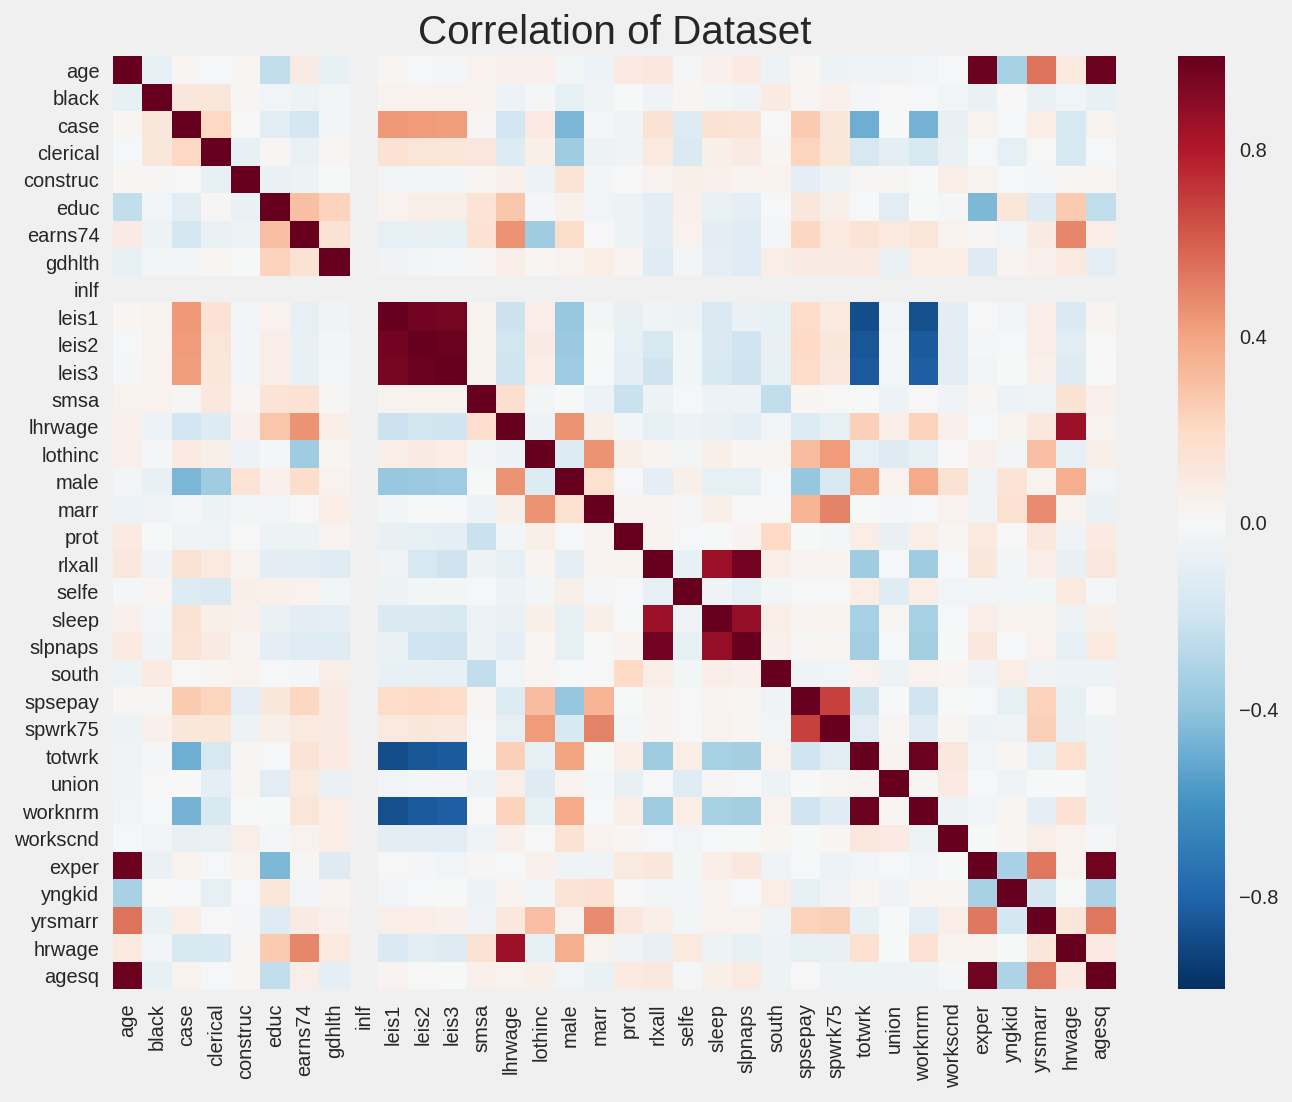

In [203]:
# Correlation Heat Map of Dataset
sleep.corr()
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
ax.set_title('Correlation of Dataset')
sns.heatmap(sleep.corr(), ax=ax)
plt.show()

## 4.1 Predictions
    Define y (mins sleep at night, per week)
    Define X (where X are your predictors => make sure to include the correct variables, i.e. exclude y, case, lothinc, and **other** variables)
    Standarized your Xs
    Train test split:
        splits your data into train test, 
        assigns a size of 30% to your test set, and use random_state=10
        print the shape of your train (X, y) and test (X, y)
---

In [106]:
# Define y and X
y = sleep['sleep']
columns_ = sleep.columns.tolist()
exclude_col = ['sleep', 'case', 'lothinc']

X = sleep[[i for i in columns_ if i not in exclude_col]]

print X.shape, y.shape

(532, 31) (532,)


In [107]:
# Standardize Xs
X_std = (X - X.mean()) / X.std()

In [108]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(372, 31) (372,)
(160, 31) (160,)


## 4.2 Machine Learning models 
    OLS, Regularization methods and evaluate the performance of your models on the train and test datasets
    Cross validate at least 10 times the R^2 scores of your models and print the average R^2 scores 
    For the OLS implement an scatter plot that shows the relation between your predicted values and the y_test values (the actual values)
    
---

In [228]:
# Defining function for MSE and R^2
def rsquare_meansquare_error(train_y, test_y, train_X, test_X, test, best_model):
    y_train_pred = best_model.predict(train_X)
    y_test_pred = best_model.predict(test_X)
    
    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(train_y, y_train_pred),
        mean_squared_error(test_y, y_test_pred)))

    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
        r2_score(train_y, y_train_pred),
        r2_score(test_y, y_test_pred)))

## 4.2.1 OLS
    
---

In [205]:
# OLS
lr = LinearRegression()
model = lr.fit(X_train, y_train)

In [206]:
print ("R^2:", model.score(X_train, y_train))
print ("Coefficients:", model.coef_)
print ("Intercept:", model.intercept_)

('R^2:', 1.0)
('Coefficients:', array([  5.95115038e-14,   6.00478001e-13,   1.67121525e-13,
        -2.71883210e-14,   2.57571742e-14,   5.55111512e-17,
        -2.66967871e-13,   0.00000000e+00,  -1.00000000e+00,
         2.00000000e-01,   2.00000000e-01,   4.46127510e-14,
        -1.45743660e-13,  -1.39194429e-13,   1.39371208e-13,
        -3.82473187e-14,   2.00000000e-01,   2.58159921e-14,
         2.00000000e-01,   1.46076727e-14,  -3.55618313e-17,
         4.91533897e-15,  -4.00000000e-01,   5.62527455e-15,
        -2.00000000e-01,  -2.00000000e-01,   3.36952688e-14,
         5.40136512e-14,   1.08246745e-15,   1.08038578e-14,
        -9.99200722e-16]))
('Intercept:', 6047.9999999999955)


In [208]:
# Summary Statistics
lr_stats = smf.ols(formula='sleep ~ totwrk', data=sleep).fit()
print lr_stats.summary()

                            OLS Regression Results                            
Dep. Variable:                  sleep   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     62.16
Date:                Mon, 20 Mar 2017   Prob (F-statistic):           1.81e-14
Time:                        21:10:39   Log-Likelihood:                -3952.0
No. Observations:                 532   AIC:                             7908.
Df Residuals:                     530   BIC:                             7917.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   3582.6831     44.650     80.240      0.0

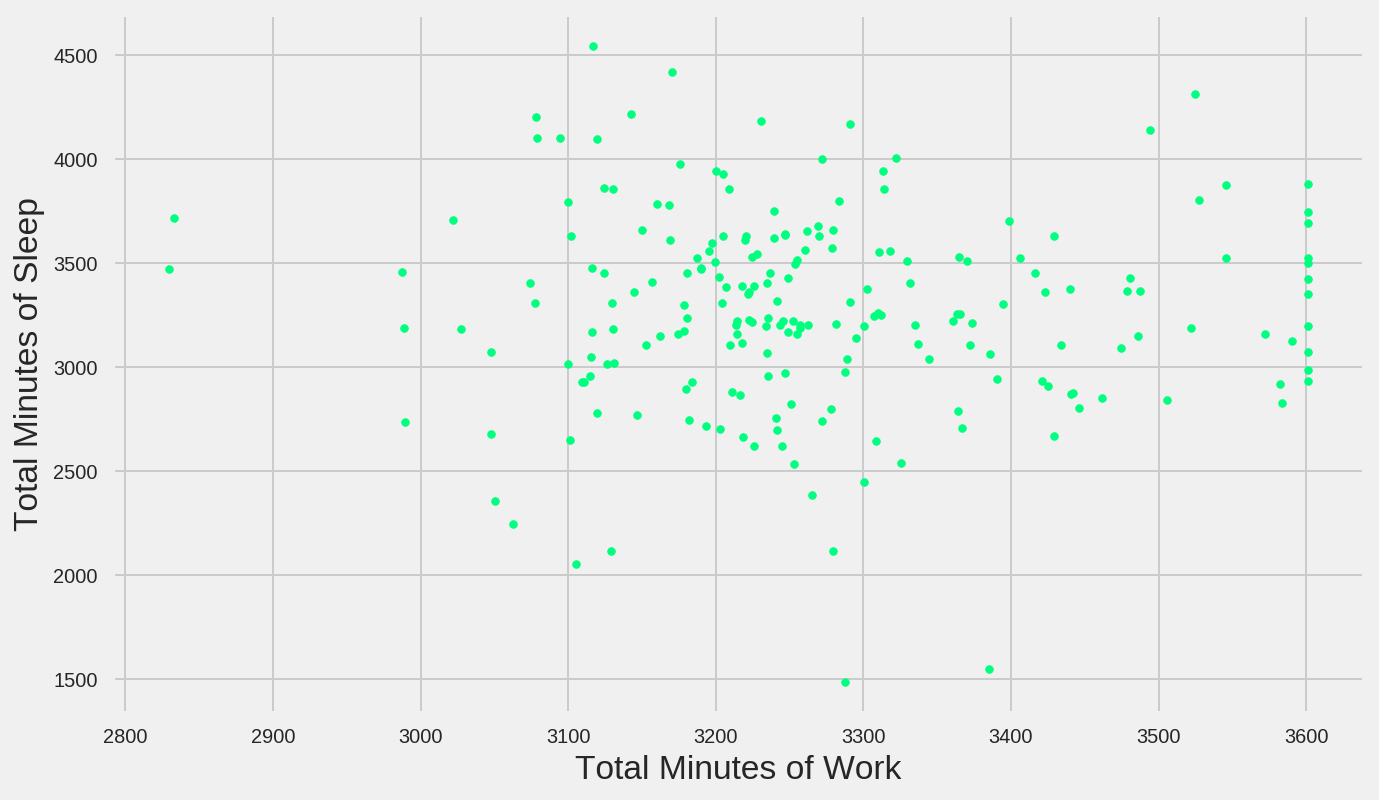

In [207]:
# Scatterplot
fig = plt.figure(figsize=(10,6))
plt.scatter(predictions1, ytest, s=14, c='springgreen', marker='o')
plt.xlabel("Total Minutes of Work")
plt.ylabel("Total Minutes of Sleep")
plt.show()

## 4.2.2 Regularization
    
---

In [116]:
# Ridge

In [209]:
# Finding the Optimal Alpha for Ridge
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)

print (optimal_ridge.alpha_)

1.0


In [160]:
# Implementing the Ridge Regression
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, X_train, y_train, cv=10)

print (ridge_scores)
print (np.mean(ridge_scores))

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
1.0


In [161]:
# Fitting the Ridge Regression
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [211]:
# Cross-Validating the Ridge Regression
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=10)
print lasso_scores

[ 0.99996043  0.99995673  0.99995154  0.99995936  0.99991759  0.99997031
  0.99996649  0.99990474  0.9999559   0.99997347]


In [229]:
# Evaluating the Ridge Regression   
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "OLS", lr)

MSE OLS train data: 0.00, test data: 0.00
R^2 OLS train data: 1.00, test data: 1.00


In [ ]:
# Lasso

In [163]:
# Finding the Optimal Alpha for Lasso
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)

print (optimal_lasso.alpha_)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

362.205363337


...............................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.2s finished
/home/dsi-student/Downloads/conda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [164]:
# Implementing the Lasso Regression
lasso = Lasso(alpha=optimal_lasso.alpha_)

print (lasso_scores)
print (np.mean(lasso_scores))

[ 0.13181183  0.1454333   0.07019872  0.01006246  0.0773731   0.20120017
  0.13319151  0.00780805  0.1946041   0.00913282]
0.0980816055718


In [165]:
# Fitting the Lasso Regression
lasso.fit(X_train, y_train)

Lasso(alpha=362.20536333680207, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [210]:
# Cross-Validating the Lasso Regression
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=10)
print lasso_scores

[ 0.99996043  0.99995673  0.99995154  0.99995936  0.99991759  0.99997031
  0.99996649  0.99990474  0.9999559   0.99997347]


In [166]:
## Evaluate the Lasso Regression
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Lasso", lasso)

MSE Lasso train data: 7.78, test data: 9.95
R^2 Lasso train data: 1.00, test data: 1.00


In [167]:
# Elastic Net

In [168]:
# Finding the Optiaml Alpha for Elastic Net 
l1_ratios = np.linspace(0.01, 1.0, 50)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=10, verbose=1)
optimal_enet.fit(X_train, y_train)

print (optimal_enet.alpha_)
print (optimal_enet.l1_ratio_)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

362.205363337
1.0


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.4min finished


In [169]:
##  Create a model Enet
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

In [170]:
# Cross Validating the Elastic Net Regression
enet_scores = cross_val_score(enet, X_train, y_train, cv=10)

print (enet_scores)
print (np.mean(enet_scores))

[ 0.99996043  0.99995673  0.99995154  0.99995936  0.99991759  0.99997031
  0.99996649  0.99990474  0.9999559   0.99997347]
0.999951655508


In [171]:
# Fitting the Elastic Net Model
enet.fit(X_train, y_train)

ElasticNet(alpha=362.20536333680207, copy_X=True, fit_intercept=True,
      l1_ratio=1.0, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [230]:
## Evaluate the Elastic Net Regression
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "ENet", enet)

MSE ENet train data: 7.78, test data: 9.95
R^2 ENet train data: 1.00, test data: 1.00


## 4.2.3 What are the features that are the best predictors of mins sleep at night, per week
    What are the features with coefficients greater than 0
---

## 4.2.3.1 Bonus
    Define a function that creates and prints the distribution of residuals on the train and test data from all the methods
---

In [ ]:
resid()


## Fit
ridge.fit(X2train, y2train)
enet.fit(X2train, y2train)
lasso.fit(X2train, y2train)


# residuals:
ridge_resid = y2test - ridge.predict(X2test)
lasso_resid = y2test - lasso.predict(X2test)
enet_resid = y2test - enet.predict(X2test)

## 4.2.4 Regression Tree 
    Gridsearch your tree
    Print the best parameters and best score from your gridsearch.
    Evaluate the performance of your tree
    Print the features that best explain your Y, are these features the same as the features you found before from the regularization methods or OLS
    
    OPTIONAL: Visualize the tree ONLY if your computer lets you do it. Your grade won't be penalized for not printing the tree, nor you will receive extra points for visualization the tree
---

In [213]:
# Defining Regression Tree Function
dtr = DecisionTreeRegressor()

parameters = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7],
           "criterion" : ['mse']
         }

In [214]:
# Defining Function for Feature Performance
def feature_importance(X, best_model):
    feature_importance = pd.DataFrame({'feature':X.columns, 'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance  

In [215]:
# Cross-Validating Regression Tree
dtr_gs = GridSearchCV(dtr, parameters, n_jobs=-1, cv=5, verbose=1)

In [216]:
# Fitting Regression Tree
dtr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    5.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'criterion': ['mse'], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [217]:
dtr_best = dtr_gs.best_estimator_ 

print "best estimator", dtr_best
print "best parameters",  dtr_gs.best_params_
print "best score", dtr_gs.best_score_

best estimator DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
best parameters {'max_features': None, 'min_samples_split': 2, 'criterion': 'mse', 'max_depth': 3, 'min_samples_leaf': 1}
best score 0.774321458453


In [218]:
feature_importance(X, dtr_best)

,feature,importance
18,slpnaps,1.0
0,age,0.0
16,rlxall,0.0
29,hrwage,0.0
28,yrsmarr,0.0
27,yngkid,0.0
26,exper,0.0
25,workscnd,0.0
24,worknrm,0.0
23,union,0.0


In [219]:
y_pred_dtr= dtr_best.predict(X_test)
y_pred_dtr

array([ 2881.80487805,  2881.80487805,  3304.67857143,  3101.93506494,
        3499.41818182,  3101.93506494,  3499.41818182,  3304.67857143,
        2881.80487805,  3304.67857143,  3101.93506494,  3754.83928571,
        2684.31428571,  3499.41818182,  3304.67857143,  3101.93506494,
        3304.67857143,  3304.67857143,  3101.93506494,  3101.93506494,
        3304.67857143,  3754.83928571,  3304.67857143,  3101.93506494,
        3304.67857143,  3304.67857143,  3101.93506494,  3101.93506494,
        3304.67857143,  2881.80487805,  3304.67857143,  3499.41818182,
        3101.93506494,  3754.83928571,  3304.67857143,  2881.80487805,
        3754.83928571,  3754.83928571,  3304.67857143,  3499.41818182,
        2238.45454545,  3101.93506494,  3754.83928571,  3499.41818182,
        3304.67857143,  3304.67857143,  2881.80487805,  3499.41818182,
        3754.83928571,  3101.93506494,  3101.93506494,  3101.93506494,
        3754.83928571,  3101.93506494,  2881.80487805,  3499.41818182,
      

In [220]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Regression tree", dtr_best)

MSE Regression tree train data: 31371.19, test data: 40384.28
R^2 Regression tree train data: 0.83, test data: 0.77


## 4.2.5 Random Forest Regression Tree
    Make sure you gridsearch your Random Forest
    Evaluate the performance
    Print the features that best explain mins sleep at night, per week 
---



In [221]:
forest = RandomForestRegressor( )

parameters = {'max_depth':[3,4,5], 
          'max_features':[2,3,4], 
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
         'n_estimators': [100]
         }

estimator_rfr = GridSearchCV(forest, parameters, n_jobs=-1,  cv=5,verbose=1)

In [222]:
## Fiting Random Forest Tree
estimator_rfr.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  2.4min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [2, 3, 4], 'max_leaf_nodes': [5, 6, 7], 'min_samples_split': [3, 4], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [223]:
rfr_best = estimator_rfr.best_estimator_

print "best estimator", rfr_best
print "best parameters", estimator_rfr.best_params_
print "best score", estimator_rfr.best_score_

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features=4, max_leaf_nodes=7, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
best parameters {'max_features': 4, 'max_leaf_nodes': 7, 'min_samples_split': 3, 'n_estimators': 100, 'max_depth': 5}
best score 0.599636800727


In [224]:
feature_importance(X, rfr_best)

,feature,importance
18,slpnaps,0.339157
16,rlxall,0.249610
22,totwrk,0.101182
8,leis1,0.054416
24,worknrm,0.048207
10,leis3,0.045290
9,leis2,0.034317
12,lhrwage,0.015317
28,yrsmarr,0.012902
26,exper,0.012822


In [188]:
y_pred_rfdtr= rfr_best.predict(X_test)
y_pred_rfdtr

array([ 2995.33795073,  2991.73098986,  3380.03910699,  3097.62066342,
        3512.85356058,  3176.80761975,  3447.62764552,  3359.89095651,
        3025.02459285,  3413.4619831 ,  3151.0158138 ,  3494.43137374,
        3016.18000764,  3391.22311797,  3388.21286296,  3095.36079098,
        3201.25372863,  3253.69114838,  3057.27400187,  3102.93289554,
        3410.25702509,  3572.36407602,  3242.74894917,  3283.30488771,
        3425.93006132,  3339.03160242,  3097.20405918,  3286.6699196 ,
        3398.39273869,  3008.76470515,  3399.61003637,  3496.40834301,
        3132.51654933,  3508.8528142 ,  3335.32898069,  3003.80492892,
        3547.97162686,  3589.95332644,  3359.02890378,  3428.17338833,
        2930.01957873,  3113.33589377,  3511.02831841,  3418.69585707,
        3287.0799617 ,  3394.25607487,  2941.38663248,  3472.7167576 ,
        3565.39952285,  3167.42601968,  3163.90825702,  3156.18689185,
        3524.04064409,  3124.17898968,  2917.98107848,  3433.87431989,
      

In [225]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Random Forest Regression tree", rfr_best)

MSE Random Forest Regression tree train data: 65826.37, test data: 80454.20
R^2 Random Forest Regression tree train data: 0.65, test data: 0.55


## 5. Based on the MSE and R^2, in your opinion which model perform best and why?
---

In [ ]:
# Based on the MSE and R^2, I choose to use the Random Forest Regression model.
# 

## 6. Was there any trade off between bias and variance whem implementing the models?
    
---

ANS:

## 7. Explain the Bias Variance trade in the model you selected?
    
---

ANS: